# World Value Survey

This dataset is a worldwide survey that explores various topics related to social, economic, and political values. Below is a breakdown of the categories included

+ ``Core Variables``
+ ``Happiness and Wellbeing``
+ ``Social Capital``
+ Trust and Organizational Membership 
+ ``Economic Values``
+ Perceptions of Corruption
+ Perceptions of Migration
+ Perceptions of Security
+ ``Index of Postmaterialism``
+ ``Perceptions about Science and Technology``
+ ``Religious Values``
+ ``Ethical Values and Norms``
+ Political Interest and Political Participation
+ Political Culture and Political Regime
+ ``Demographics``


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Inspecting dataset

In [2]:
#os.chdir("C:/Users/camil/OneDrive/EPFL/MA4/Dataviz/World Values Survey")
df = pd.read_csv("data/WVS_Cross-National_Wave_7_csv_v6_0.csv")
display(df.head())
print(f"The dataset is composed of {df.shape[0]} participants and {df.shape[1]} features")

C:\Users\camil\AppData\Local\Temp\ipykernel_5332\3001644019.py:2: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/WVS_Cross-National_Wave_7_csv_v6_0.csv")


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


The dataset is composed of 97220 participants and 613 features


The dataset is composed of a lot of features!

# What about missing values?

## How many features contain missig values?

<AxesSubplot: xlabel='Feature with Missing Values', ylabel='count'>

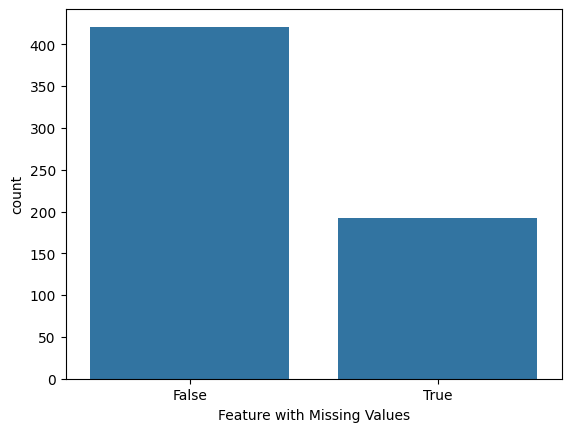

In [3]:
features_nan = df.isna().any().reset_index()
features_nan.columns = ["Feature", "Feature with Missing Values"]

nan_per_feature = features_nan.value_counts('Feature with Missing Values').reset_index()

# Plot
sns.barplot(x="Feature with Missing Values", y="count", data=nan_per_feature)

## How many missing values do these features contain?

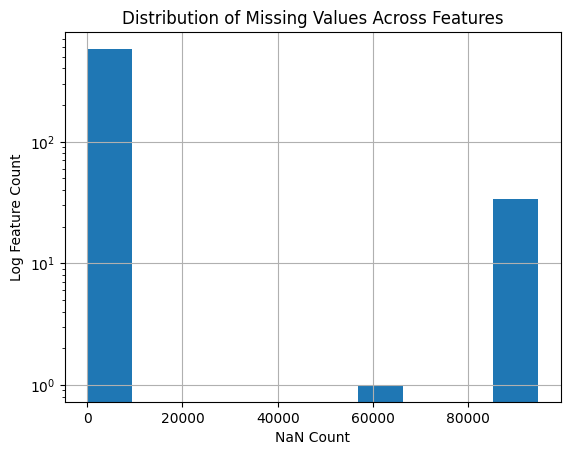

In [6]:
# Calculate the number of NaN values in each column
na_counts = df.isna().sum()
# Plotting the NaN counts as a hist
sns.set_palette("tab10")
na_counts.hist(log=True, color=sns.color_palette("tab10")[0])
plt.title("Distribution of Missing Values Across Features")
plt.xlabel("NaN Count")
plt.ylabel("Log Feature Count")
plt.savefig('Figures/Nan_Distibution.png')
plt.show()


## Handling Attributes with Missing Values

In [7]:
df_clean = df.dropna(axis=1, how='any')
print(f"{df.shape[1] - df_clean.shape[1]} features ({int((df.shape[1] - df_clean.shape[1])/df.shape[1]*100)}% of features) contained missing values and were removed")
display(df_clean.head())
print(f"The cleaned dataset is now composed of {df_clean.shape[1]} features and {df_clean.shape[0]} participants")

192 features (31% of features) contained missing values and were removed


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,Q292N,Q292O,Q293,Q294A,Q294B,Y001,Y002,Y003,SECVALWGT,RESEMAVALWGT
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,-4,-4,-4,-4,-4,1,1,0,0.830,1.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,-4,-4,-4,-4,-4,2,3,-1,0.915,1.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,-4,-4,-4,-4,-4,4,2,2,0.915,1.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,-4,-4,-4,-4,-4,3,2,0,0.830,1.0
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,-4,-4,-4,-4,-4,2,1,1,0.830,1.0


The cleaned dataset is now composed of 421 features and 97220 participants


C:\Users\camil\AppData\Local\Temp\ipykernel_5332\2057854457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_type.value_counts().reset_index(), x='Type', y='count', palette="tab10")


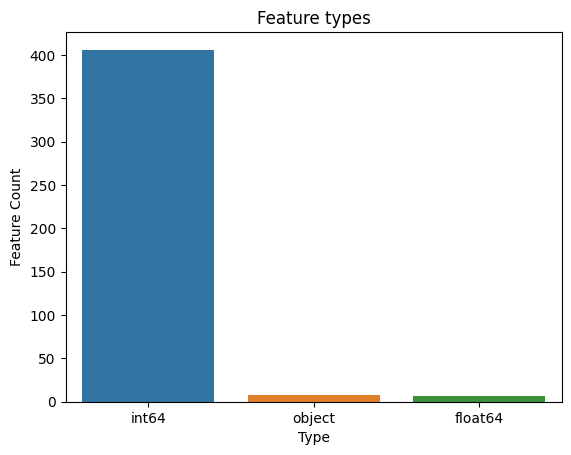

In [8]:
features_type = df_clean.dtypes.to_frame("Type")

sns.barplot(data=features_type.value_counts().reset_index(), x='Type', y='count', palette="tab10")
plt.ylabel("Feature Count")
plt.title('Feature types')
plt.savefig("Figures/Feature types")

# Let's look at the diversity in represented countries and continents.

The aim of this analysis is to visualize given features of countries all over the world this diversity is key to out project! Since the continent is not part of our data we have used ChatGPT to map each country code to their matching continent

In [9]:
# Country to continent mapping (Done with ChatGPT)
continent_mapping = {
    # North America
    "CAN": "North America", "USA": "North America", "MEX": "North America",
    "NIC": "North America", "PRI": "North America", "GTM": "North America",

    # South America
    "ARG": "South America", "BRA": "South America", "BOL": "South America",
    "CHL": "South America", "COL": "South America", "ECU": "South America",
    "PER": "South America", "URY": "South America", "VEN": "South America",

    # Europe
    "AND": "Europe", "AUT": "Europe", "BEL": "Europe", "BIH": "Europe", 
    "BGR": "Europe", "HRV": "Europe", "CYP": "Europe", "CZE": "Europe",
    "DNK": "Europe", "EST": "Europe", "FIN": "Europe", "FRA": "Europe",
    "DEU": "Europe", "GRC": "Europe", "HUN": "Europe", "ISL": "Europe",
    "IRL": "Europe", "ITA": "Europe", "LVA": "Europe", "LTU": "Europe",
    "LUX": "Europe", "MLT": "Europe", "NLD": "Europe", "MKD": "Europe",
    "NOR": "Europe", "POL": "Europe", "PRT": "Europe", "ROU": "Europe",
    "RUS": "Europe", "SRB": "Europe", "SVK": "Europe", "SVN": "Europe",
    "ESP": "Europe", "SWE": "Europe", "CHE": "Europe", "GBR": "Europe",
    "UKR": "Europe", "NIR": "Europe", "MNE": "Europe",

    # Africa
    "EGY": "Africa", "ETH": "Africa", "KEN": "Africa", "LBY": "Africa",
    "MAR": "Africa", "NGA": "Africa", "TUN": "Africa", "ZWE": "Africa",

    # Asia
    "ARM": "Asia", "AZE": "Asia", "BGD": "Asia", "CHN": "Asia",
    "GEO": "Asia", "HKG": "Asia", "IND": "Asia", "IDN": "Asia",
    "IRN": "Asia", "IRQ": "Asia", "ISR": "Asia", "JPN": "Asia",
    "JOR": "Asia", "KAZ": "Asia", "KGZ": "Asia", "KOR": "Asia",
    "MAC": "Asia", "MYS": "Asia", "MDV": "Asia", "MNG": "Asia",
    "MMR": "Asia", "NPL": "Asia", "PAK": "Asia", "PHL": "Asia",
    "SGP": "Asia", "TJK": "Asia", "THA": "Asia", "TUR": "Asia",
    "TWN": "Asia", "UZB": "Asia", "VNM": "Asia", "LBN": "Asia",

    # Oceania
    "AUS": "Oceania", "NZL": "Oceania"
}


In [10]:
# Select only country information
df_country = df_clean[['B_COUNTRY_ALPHA']]

# Add continent information
df_country['CONTINENT'] = df_country['B_COUNTRY_ALPHA'].map(continent_mapping)

# Display
df_country.head()

C:\Users\camil\AppData\Local\Temp\ipykernel_5332\643517656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['CONTINENT'] = df_country['B_COUNTRY_ALPHA'].map(continent_mapping)


,B_COUNTRY_ALPHA,CONTINENT
0,AND,Europe
1,AND,Europe
2,AND,Europe
3,AND,Europe
4,AND,Europe


## Are all countries equally represented?

C:\Users\camil\AppData\Local\Temp\ipykernel_5332\1925587940.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=participant_per_cont, x='CONTINENT', y='Participant Count', palette="Set2", ax=axes[1])


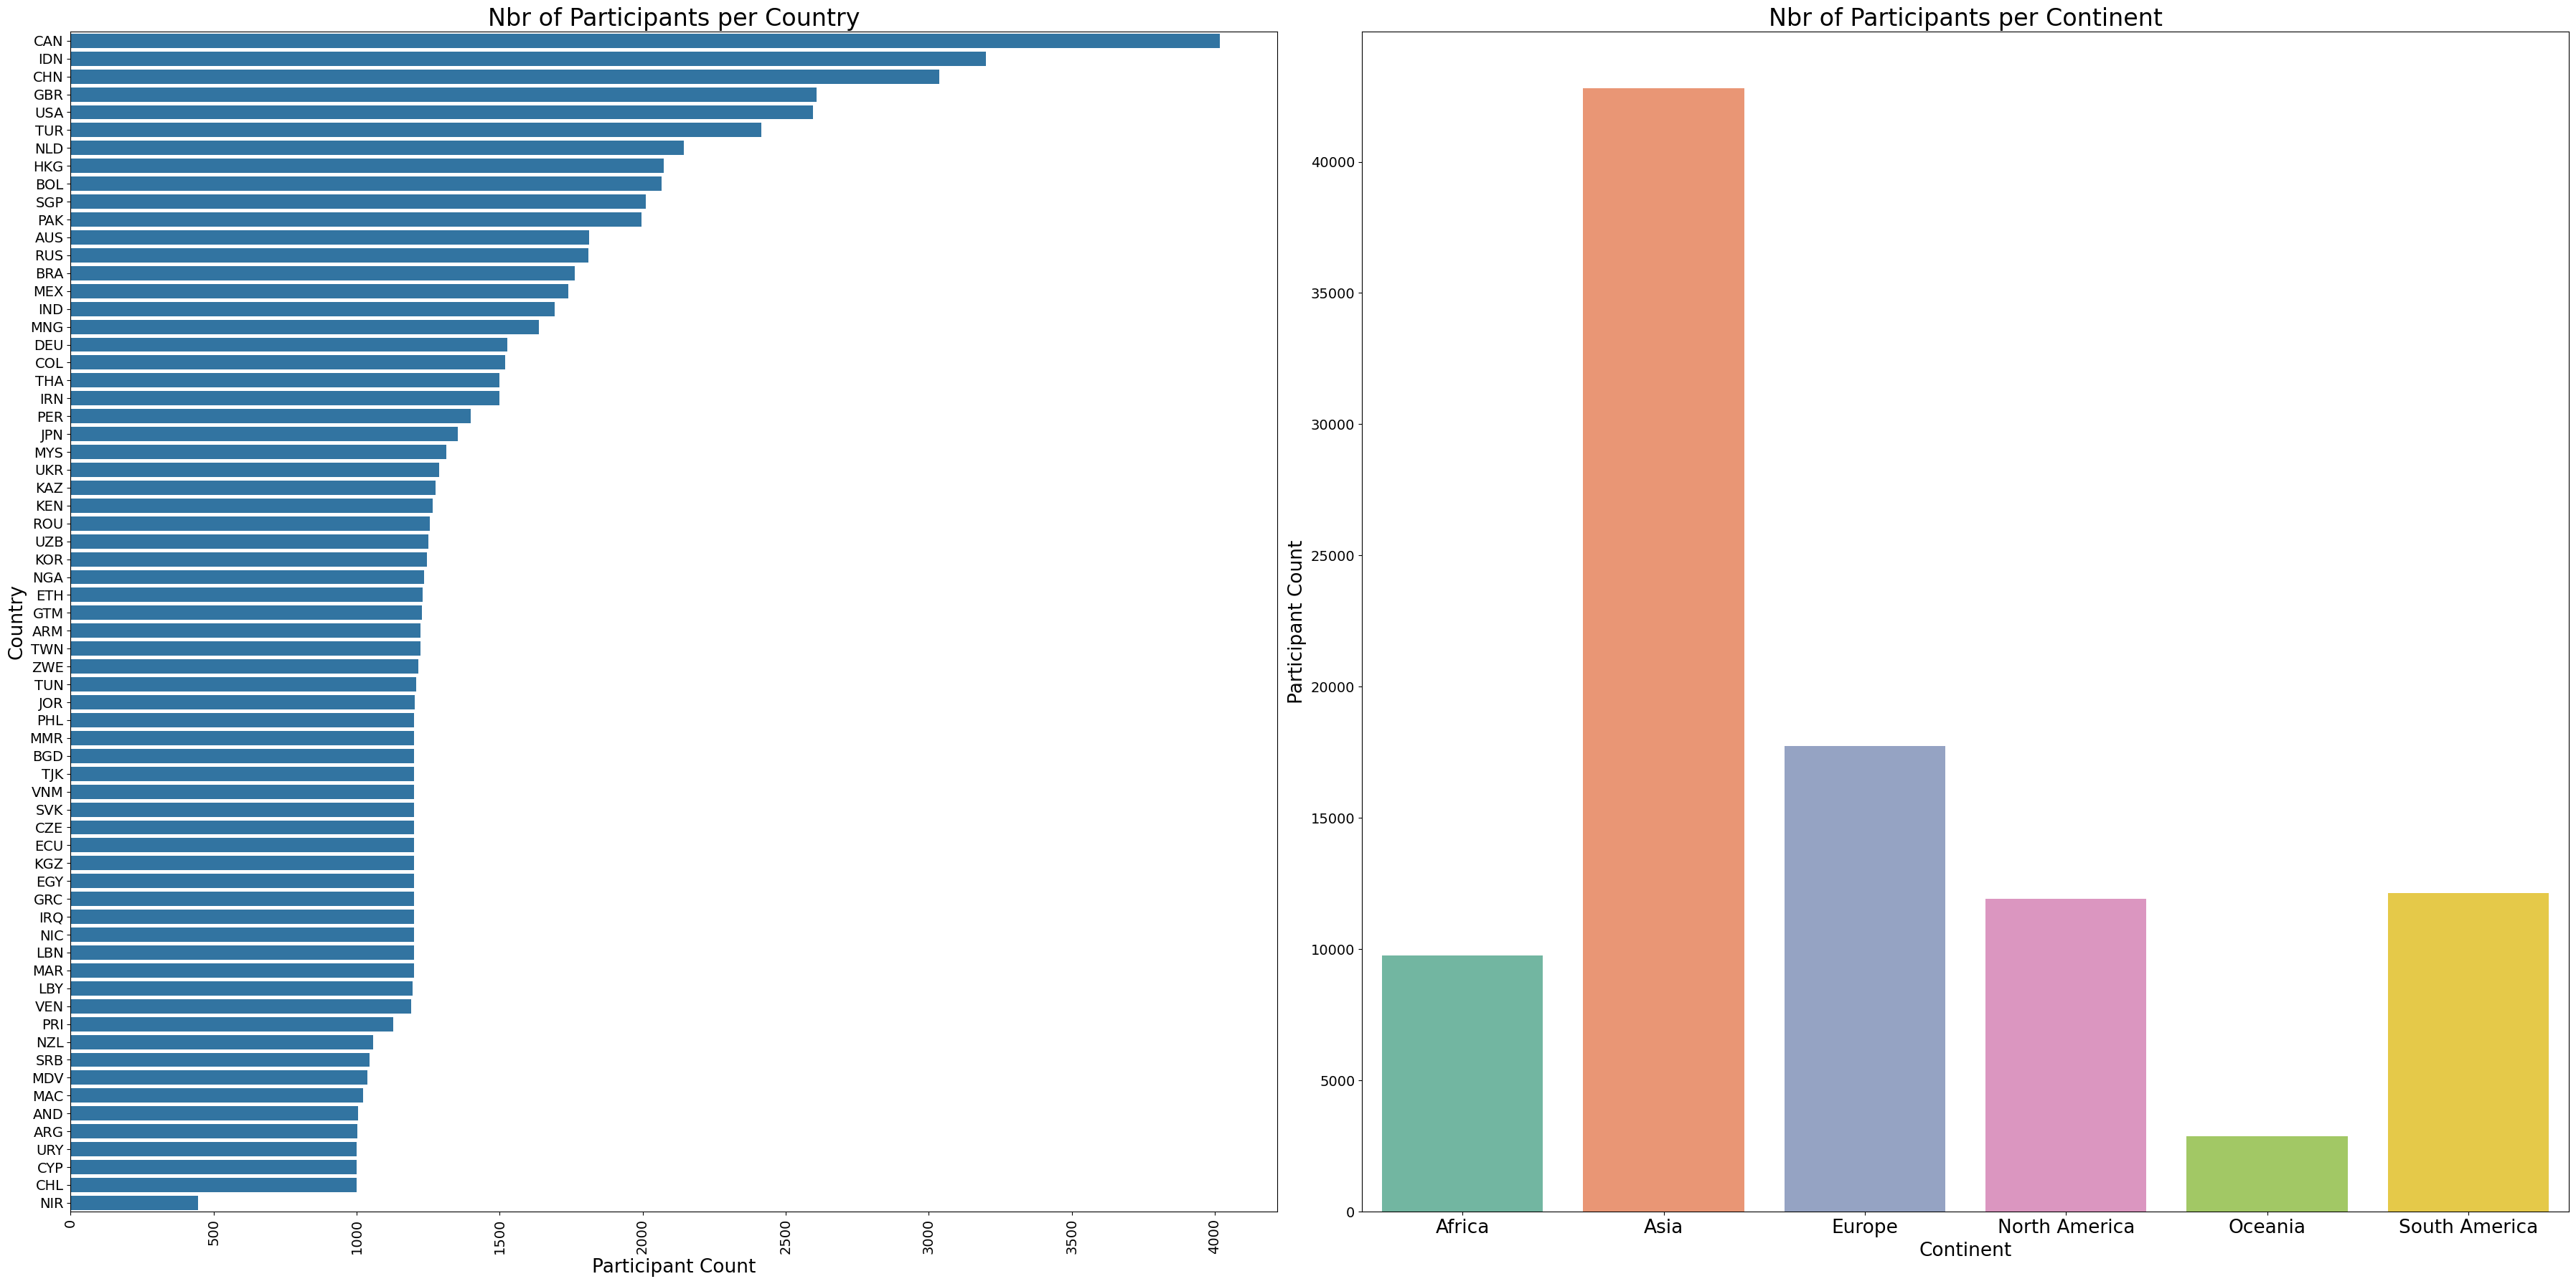

There are 66 countries


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(36, 18)) 

# Participants per country
# Group by Country
participants_per_country = df_country.groupby(by='B_COUNTRY_ALPHA').count().reset_index()
participants_per_country.columns = ['Country', 'Participant Count']
# Sort by most to least represented
questions_answered_per_country = participants_per_country.sort_values(by='Participant Count', ascending=False)
# Plot
sns.barplot(data=questions_answered_per_country, y='Country', x='Participant Count', ax=axes[0])
axes[0].set_title('Nbr of Participants per Country', fontsize=24)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Participant Count', fontsize=19)  # Increase x-axis label font size
axes[0].set_ylabel('Country', fontsize=19)  # Increase y-axis label font size
axes[0].tick_params(axis='x', rotation=90, labelsize=14)  # Increase axis tick font size
axes[0].tick_params(axis='y', labelsize=14)  # Increase y-axis tick font size
# Participants per continent
# Group by continent
participant_per_cont = df_country.groupby('CONTINENT').count().reset_index()
participant_per_cont.columns = ['CONTINENT', 'Participant Count']
sns.barplot(data=participant_per_cont, x='CONTINENT', y='Participant Count', palette="Set2", ax=axes[1])
axes[1].set_title('Nbr of Participants per Continent', fontsize=24)
axes[1].tick_params(axis='x', labelsize=19)  # Increase x-axis tick font size
axes[1].tick_params(axis='y', labelsize=14)  # Increase y-axis tick font size
axes[1].set_xlabel('Continent', fontsize=19)  # Increase x-axis label font size
axes[1].set_ylabel('Participant Count', fontsize=19)  # Increase y-axis label font siz

plt.tight_layout()
plt.savefig("Figures/participants_per_country_continent.png")
plt.show()
print(f"There are {participants_per_country.shape[0]} countries")


We notice that there are some disparities between the number of participants in countries.
Africa migh be under represented compared to the number habitants

# Questions

## Check how many questions we have per section

In [12]:
section_to_question = {
    "Social Values, Norms, Stereotypes": ["Q1","Q45"],
    "Happiness and Wellbeing": ["Q46","Q56"],
    "Social Capital, Trust and Organizational Membership": ["Q57","Q105"],
    "Economic Values": ["Q106","Q111"],
    "Perceptions of Corruption": ["Q112","Q120"],
    "Perceptions of Migration": ["Q121","Q130"],
    "Perceptions of Security": ["Q131","Q151"],
    "Index of Postmaterialism": ["Q152","Q157"],
    "Perceptions about Science and Technology": ["Q158","Q163"],
    "Religious Values": ["Q164","Q175"],
    "Ethical Values": ["Q176","Q198"],
    "Political Interest and Political Participation": ["Q199","Q234"],
    "Political Culture and Political Regimes": ["Q235","Q259"],
    "Demographic and Socioeconomic Variables": ["Q260","Q290"],
    "MENA regional module": ["MN01","MN38"],
    "Political trust module": ["Q291","Q294"],
    "Women Economic Empowerment module": ["WEE variables"],
    "Gender module": ["G & H variables"],
    "Region ISO 3166-2": ["N_Region_ISO"],
    "Region country-specific": ["N_Region_WVS"],
    "Region NUTS-2": ["N_REGION_NUTS2"],
    "Settlement name": ["N_Town"],
    "Language of the interview": ["S_IntLanguage"],
    "Language in which interview was conducted (ISO 639-1 Alpha 2)": ["LNGE_ISO"],
    "Political parties list": ["Q223"],
    "Country of birth": ["Q266", "Q267", "Q268"],
    "Language spoken at home": ["Q272"],
    "Country-specific education levels": ["Q275A", "Q276A", "Q277Q", "Q278A"],
    "Religious denomination: country-specific options": ["Q289CS"],
    "Racial and ethnic belonging": ["Q290"]
}

For this analysis we only look into these given sections:
+ Core Variables, KEEP
+ Happiness and Wellbeing, KEEP
+ Social Capital, KEEP
+ Trust and Organizational Membership (Q57-Q105), 
+ Economic Values, KEEP
+ Index of Postmaterialism, KEEP
+ Perceptions about Science and Technology, KEEP
+ religious values, KEEP
+ ethical values and norms, *KEEP*
+ demographics, KEEP

In [13]:
def extract_specific_section(section_o_i):
        # Format already good for sections with 1 element or complete list
        if (len(section_to_question[section_o_i]) == 1) or (len(section_to_question[section_o_i]) > 2):
            return section_to_question[section_o_i]
        
        # Extracts upper and lower questions indices
        lower_question_idx = int(section_to_question[section_o_i][0][1:])
        upper_question_idx = int(section_to_question[section_o_i][1][1:])

        # Creates list with all questions from the section of interest
        section_questions_idx = ['Q'+ str(i) for i in range(lower_question_idx, upper_question_idx + 1)]

        return section_questions_idx

def extract_specific_sections(sections_o_i):

    questions_idx = []
    for section in sections_o_i:
        questions_idx.extend(extract_specific_section(section))
    
    return(questions_idx)
    

C:\Users\camil\AppData\Local\Temp\ipykernel_5332\3735227946.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = questions_per_section.sort_values(by='Question Count', ascending=False), x='Question Count', y='Section',palette="tab10" )


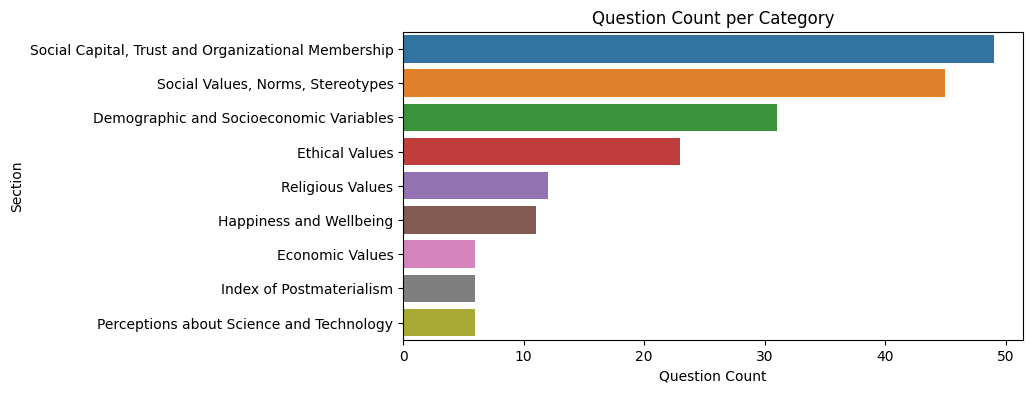

In [14]:
sections_o_i = [
    "Social Values, Norms, Stereotypes",
    "Happiness and Wellbeing",
    "Social Capital, Trust and Organizational Membership",
    "Economic Values",
    "Index of Postmaterialism",
    "Perceptions about Science and Technology",
    "Religious Values",
    "Ethical Values",
    "Demographic and Socioeconomic Variables"
]

nbr_of_questions_per_section = [len(extract_specific_section(section)) for section in sections_o_i]

questions_per_section = pd.DataFrame({"Section": sections_o_i,"Question Count":nbr_of_questions_per_section })

plt.figure(figsize=(8, 4))
sns.barplot(data = questions_per_section.sort_values(by='Question Count', ascending=False), x='Question Count', y='Section',palette="tab10" )
plt.title("Question Count per Category")
plt.savefig("Figures/Nbr of questions per category", bbox_inches='tight')
plt.show()

## Attempt to sparse the pdf with answers

In [16]:
import PyPDF2
import re

# Path to the PDF
pdf_path = "data/WVS Codebook Variables V6.0.pdf"

# Open the PDF file and extract text from page 10
with open(pdf_path, "rb") as file:
    reader = PyPDF2.PdfReader(file)
    
    # Ensure the PDF has at least 10 pages
    if len(reader.pages) >= 10:
        page_text = reader.pages[9].extract_text()  # Page numbers are 0-indexed
    else:
        print("The document has fewer than 10 pages.")
        page_text = ""

# Define regex patterns
question_pattern = re.compile(r"(Q\d+)\s(.*?)\n(.*?)\n((?:\d+\.-.*?\n?)+)", re.DOTALL)

# Lists to store extracted data
question_idx = []
description = []
question_list = []
answer_list = []

# Process extracted text
for match in question_pattern.finditer(page_text):
    q_idx = match.group(1)  # Extract question number (e.g., Q1)
    q_description = match.group(2).strip()  # Extract description (e.g., Important in life: Family)
    q_text = match.group(3).strip()  # Extract question text
    answers = match.group(4).strip()  # Extract answer options
    
    # Extract answer choices into a dictionary
    answer_dict = {}
    for ans in re.findall(r"(\d+\.-\s.*?)(?=\d+\.-|\Z)", answers, re.DOTALL):
        key, value = ans.split(".-", 1)
        answer_dict[key.strip()] = value.strip()
    
    # Append to lists
    question_idx.append(q_idx)
    description.append(q_description)
    question_list.append(q_text)
    answer_list.append(answer_dict)

# Structure extracted data
extracted_data = {
    "question_idx": question_idx,
    "description": description,
    "question": question_list,
    "answer": answer_list,
}

# Print extracted data for validation
pd.DataFrame(extracted_data)


,question_idx,description,question,answer
0,Q1,-Q45),Q1 Important in life: Family \nFor each of th...,{}
1,Q2,Important in life: Friends,"For each of the following aspects, indicate ho...",{}
2,Q3,Important in life: Leisure time,"For each of the following aspects, indicate ho...",{}
3,Q4,Important in life: Politics,"For each of the following aspects, indicate ho...",{}
